<style>
    * {
        font-family: 'Calibri', sans-serif;
    }
</style>
<h1> STR459 - Artificial Intelligence and Robotics <h1>
<h3 style="margin-top: -20px"> SPRING 2024</h3>

Candidates: 17, 36, 48, 54 & 92

<h3>Table of Contents:</h3>

<ol style="font-size: 18px; font-family: 'Calibri', sans-serif">
    <li>Importing Libraries</li>
    <li>Exploratory Data Analysis (EDA)
        <ol>
            <li>Figure 1 - Distributions of categorical variables</li>
            <li>Figure 2 - Correlation Matrix</li>
            <li>Figure 3 - Box-plots</li>
            <li>Figure 4 - Distributions of numerical variables</li>
            <li>Figure 5 - Pairplot</li>
        </ol>
    </li>
    <li>Train-Test-Split
        <ol>
            <li>Figure 6 - train-test distribution comparison</li>
            <li>Figure 7 - SMOTE train-test distribution comparison</li>
        </ol>
    </li>
    <li>Building Machine Learning Models
        <ol>
            <li>Logistic Regression</li>
            <li>Decision Tree Classifier</li>
            <li>Extreme Gradient Boosting</li>
        </ol>
    </li>
    <li>Sources</li>
</ol>


<h2> 1. Importing Libraries </h2>

The notebook is compatible with python version 3.11 and the library versions in the 'requirements.txt' file. The following libraries have been used:

In [1]:
import pandas as pd               # Used for data manipulation
import numpy as np                # Used for numerical operations
import matplotlib.pyplot as plt   # Used for plotting
import seaborn as sns             # Used for advanced plotting

from sklearn.model_selection import (train_test_split,  # Used to split data
                                     cross_val_score)   # Used for cross validation

from sklearn.metrics import (roc_auc_score,             # Used for performance metrics
                             confusion_matrix,                       
                             roc_curve, 
                             auc)

from sklearn.tree import DecisionTreeClassifier       # Used for decision tree
from sklearn.ensemble import RandomForestClassifier   # Used for random forest 
from sklearn.linear_model import LogisticRegression   # Used for logistic regression 
from xgboost import XGBClassifier                     # Used for XGboost model

from sklearn.preprocessing import StandardScaler      # Used for feature scaling
from imblearn.over_sampling import SMOTE              # Used to handle imbalanced data


import optuna  # Used for hyperparameter optimization

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)  # Versions are in 'requirements.txt'
warnings.filterwarnings('ignore', category=UserWarning)    # Used to ignore pairplot warnings

# Display option
pd.set_option('display.max_columns', None)

<h2> 2. Exploratory Data Analysis (EDA) </h2>

In [2]:
# Reading in the data
df = pd.read_csv('BankChurners.csv')
df = df.iloc[:, :-2] # Removing two last columns
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [3]:
# Getting some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Some columns are objects - let's look at those:

In [4]:
# Getting all variables that are object by selecting unique keys for all dtype object
object_variables_unique_values = {column: df[column].unique() for column in df.columns if df[column].dtype == 'object'}
# Preparing output by turning items into a string
output = "\n\n".join([f"{column} variables: {', '.join(values)}" for column, values in object_variables_unique_values.items()])
print(output)

Attrition_Flag variables: Existing Customer, Attrited Customer

Gender variables: M, F

Education_Level variables: High School, Graduate, Uneducated, Unknown, College, Post-Graduate, Doctorate

Marital_Status variables: Married, Single, Unknown, Divorced

Income_Category variables: $60K - $80K, Less than $40K, $80K - $120K, $40K - $60K, $120K +, Unknown

Card_Category variables: Blue, Gold, Silver, Platinum


Looking at the distributions of each categorical variable:

<h3> 2.1 Figure 1 - Distributions of categorical variables </h3>

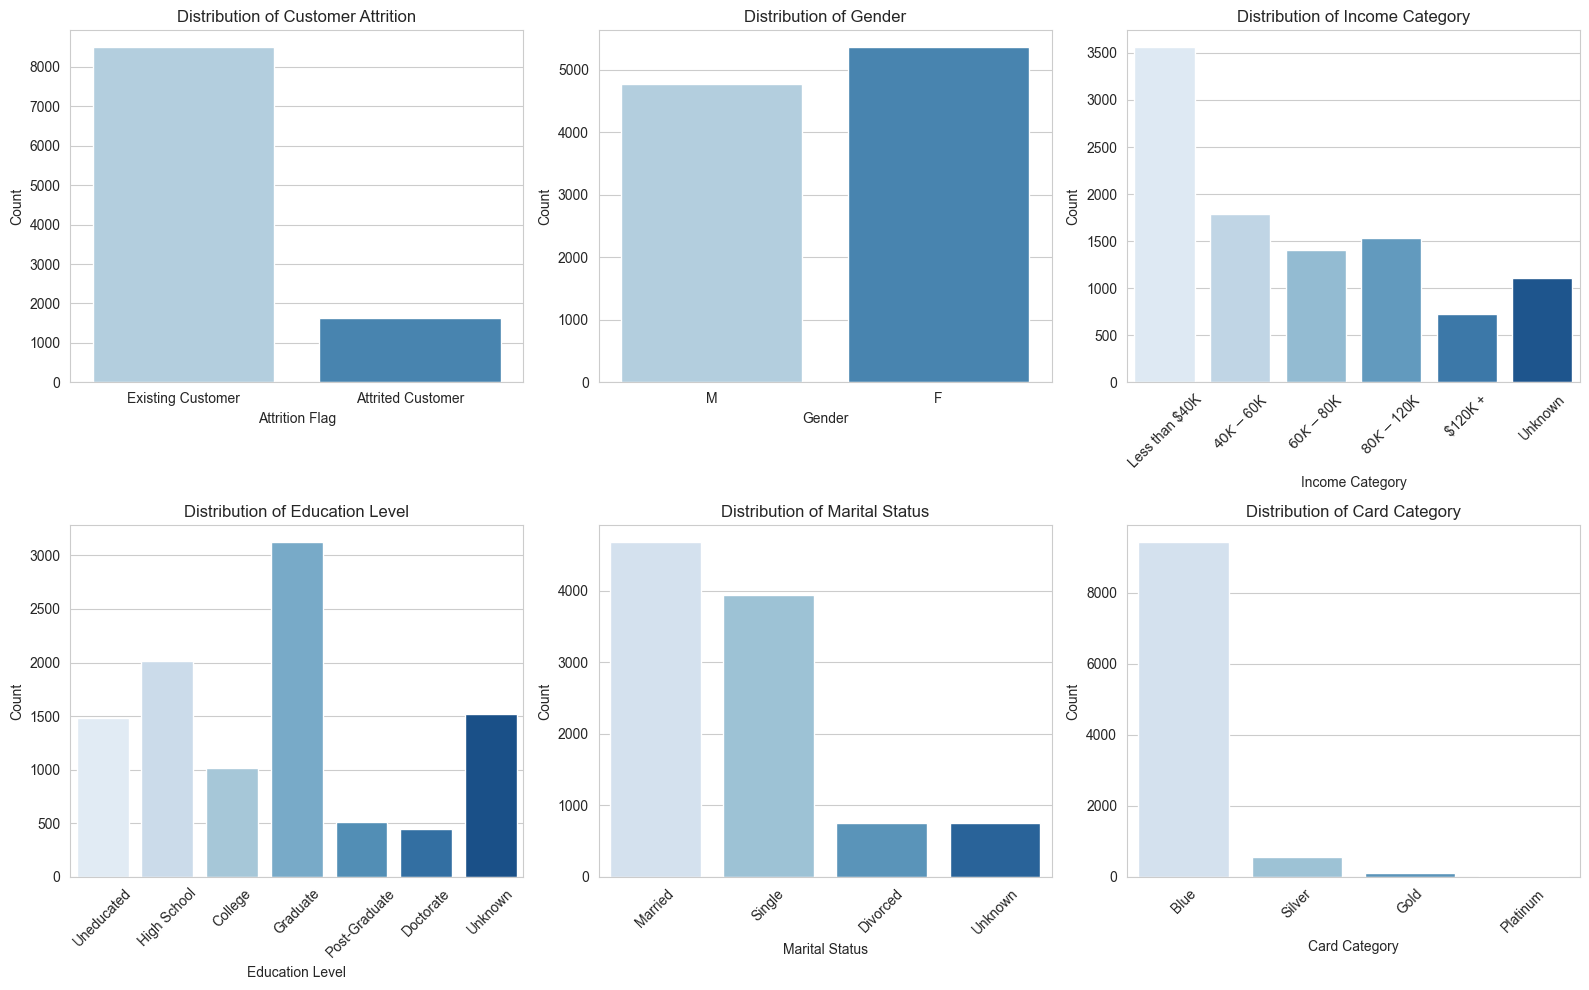

In [5]:
# Style
sns.set_style('whitegrid')

# Data for plotting
plot_data = [
    {'column': 'Attrition_Flag', 'order': ['Existing Customer', 'Attrited Customer'], 'title': 'Distribution of Customer Attrition'},
    {'column': 'Gender', 'order': ['M', 'F'], 'title': 'Distribution of Gender'},
    {'column': 'Income_Category', 'order': ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'], 'title': 'Distribution of Income Category'},
    {'column': 'Education_Level', 'order': ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown'], 'title': 'Distribution of Education Level'},
    {'column': 'Marital_Status', 'order': ['Married', 'Single', 'Divorced', 'Unknown'], 'title': 'Distribution of Marital Status'},
    {'column': 'Card_Category', 'order': ['Blue', 'Silver', 'Gold', 'Platinum'], 'title': 'Distribution of Card Category'}
]

# Create a figure
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, plot_info in enumerate(plot_data):
    sns.countplot(x=plot_info['column'], data=df, ax=axes[i], palette='Blues', order=plot_info['order'])
    axes[i].set_title(plot_info['title'])
    axes[i].set_xlabel(plot_info['column'].replace('_', ' '))
    axes[i].set_ylabel('Count')
    if plot_info['column'] not in ['Attrition_Flag', 'Gender']:
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].tick_params(axis='x')  

plt.tight_layout()
plt.show()

Looking at 'Unknown' data entries:

In [6]:
# Convert all 'Unknown' values in the dataset to NaN
df.replace('Unknown', pd.NA, inplace=True)

# Count missing values across the dataset
missing_values_count = df.isna().sum()

missing_values_count

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

Removing unknown data entries

In [7]:
df = df.dropna()

We can additionaly see that the 'Attrition_Flag' column (the target variable) is imbalanced. Addressing this is done later. 

In [8]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    5968
Attrited Customer    1113
Name: count, dtype: int64

For handling categorical variables, we map binary variables to values 0 and 1. We assign ordinal variables values starting from 0. Nominal variables are one-hot encoded with drop_first = True to avoid the dummy variable trap. We could treat 'Card_Category' as ordinal as well, but we decided not to because of uncertainty in the distances between levels

In [9]:
# Convert categorical variables to numerical formats

# Map for ordinal encoding of Income_Category
income_mapping = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4
}

# Map for ordinal encoding of Education_Level
education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}

# Label encoding for Attrition_Flag and Gender
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Ordinal encoding for Income_Category and Education_Level
df['Income_Category'] = df['Income_Category'].map(income_mapping)
df['Education_Level'] = df['Education_Level'].map(education_mapping)

# One-hot encoding for Marital_Status and Card_Category
df = pd.get_dummies(df, columns=['Marital_Status', 'Card_Category'], drop_first=True)

# Convert all boolean columns to integer (0 and 1)
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

# Display changes
df.head()

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               0            45       0                3   
1  818770008               0            49       1                5   
2  713982108               0            51       0                3   
4  709106358               0            40       0                3   
5  713061558               0            44       0                2   

   Education_Level  Income_Category  Months_on_book  Total_Relationship_Count  \
0                1                2              39                         5   
1                3                0              44                         6   
2                3                3              36                         4   
4                0                2              21                         5   
5                3                1              36                         3   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
4                    0           4716.0                 2.175   
5                 1247           2763.0                 1.376   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
4              816              28                2.500   
5             1088              24                0.846   

   Avg_Utilization_Ratio  Marital_Status_Married  Marital_Status_Single  \
0                  0.061                       1                      0   
1                  0.105                       0                      1   
2                  0.000                       1                      0   
4                  0.000                       1                      0   
5                  0.311                       1                      0   

   Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
0                   0                       0                     0  
1                   0                       0                     0  
2                   0                       0                     0  
4                   0                       0                     0  
5                   0                       0                     0

Getting a descriptive table:

In [10]:
# Descriptive statistics for numerical features
desc_stats = df.describe()

# Unique counts
unique_counts = df.nunique()

# Missing values
missing_values = df.isnull().sum()

# Descriptive statistics DataFrame
desc_stats_df = desc_stats.T  # Transpose to have features as rows
desc_stats_df = desc_stats_df.reset_index()
desc_stats_df.rename(columns={'index': 'Feature'}, inplace=True)

# Unique counts in DataFrame
unique_counts_df = unique_counts.reset_index()
unique_counts_df.columns = ['Feature', 'Unique Counts']

# Missing values in DataFrame
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Feature', 'Missing Values']

# Merging all the DataFrames into EDA summary
eda_summary = pd.merge(desc_stats_df, unique_counts_df, on='Feature', how='outer')
eda_summary = pd.merge(eda_summary, missing_values_df, on='Feature', how='outer')

# Output format
pd.options.display.float_format = '{:.2f}'.format

# Display the EDA summary
eda_summary

Feature   count         mean         std          min  \
0             Attrition_Flag 7081.00         0.16        0.36         0.00   
1            Avg_Open_To_Buy 7081.00      7325.27     9131.22         3.00   
2      Avg_Utilization_Ratio 7081.00         0.28        0.28         0.00   
3                  CLIENTNUM 7081.00 739091922.52 36852441.97 708082083.00   
4         Card_Category_Gold 7081.00         0.01        0.11         0.00   
5     Card_Category_Platinum 7081.00         0.00        0.04         0.00   
6       Card_Category_Silver 7081.00         0.06        0.23         0.00   
7      Contacts_Count_12_mon 7081.00         2.45        1.10         0.00   
8               Credit_Limit 7081.00      8492.77     9126.07      1438.30   
9               Customer_Age 7081.00        46.35        8.04        26.00   
10           Dependent_count 7081.00         2.34        1.29         0.00   
11           Education_Level 7081.00         2.07        1.40         0.00   
12                    Gender 7081.00         0.48        0.50         0.00   
13           Income_Category 7081.00         1.34        1.36         0.00   
14    Marital_Status_Married 7081.00         0.50        0.50         0.00   
15     Marital_Status_Single 7081.00         0.42        0.49         0.00   
16    Months_Inactive_12_mon 7081.00         2.34        1.00         0.00   
17            Months_on_book 7081.00        35.98        8.00        13.00   
18      Total_Amt_Chng_Q4_Q1 7081.00         0.76        0.22         0.00   
19       Total_Ct_Chng_Q4_Q1 7081.00         0.71        0.24         0.00   
20  Total_Relationship_Count 7081.00         3.82        1.54         1.00   
21       Total_Revolving_Bal 7081.00      1167.50      812.32         0.00   
22           Total_Trans_Amt 7081.00      4394.30     3468.46       510.00   
23            Total_Trans_Ct 7081.00        64.50       23.81        10.00   

            25%          50%          75%          max  Unique Counts  \
0          0.00         0.00         0.00         1.00              2   
1       1248.00      3250.00      9491.00     34516.00           5144   
2          0.03         0.19         0.52         1.00            946   
3  713010483.00 717843783.00 773236983.00 828298908.00           7081   
4          0.00         0.00         0.00         1.00              2   
5          0.00         0.00         0.00         1.00              2   
6          0.00         0.00         0.00         1.00              2   
7          2.00         2.00         3.00         6.00              7   
8       2498.00      4287.00     10729.00     34516.00           4654   
9         41.00        46.00        52.00        73.00             45   
10         1.00         2.00         3.00         5.00              6   
11         1.00         2.00         3.00         5.00              6   
12         0.00         0.00         1.00         1.00              2   
13         0.00         1.00         3.00         4.00              5   
14         0.00         1.00         1.00         1.00              2   
15         0.00         0.00         1.00         1.00              2   
16         2.00         2.00         3.00         6.00              7   
17        31.00        36.00        40.00        56.00             44   
18         0.63         0.73         0.86         3.40           1067   
19         0.58         0.70         0.82         3.71            771   
20         3.00         4.00         5.00         6.00              6   
21       463.00      1282.00      1781.00      2517.00           1821   
22      2089.00      3831.00      4740.00     17995.00           4194   
23        44.00        67.00        80.00       134.00            124   

    Missing Values  
0                0  
1                0  
2                0  
3                0  
4                0  
5                0  
6                0  
7                0  
8                0  
9                0  
10           

Getting a look at a correlation matrix:

<h3> 2.2 Figure 2 - Correlation Matrix </h3>

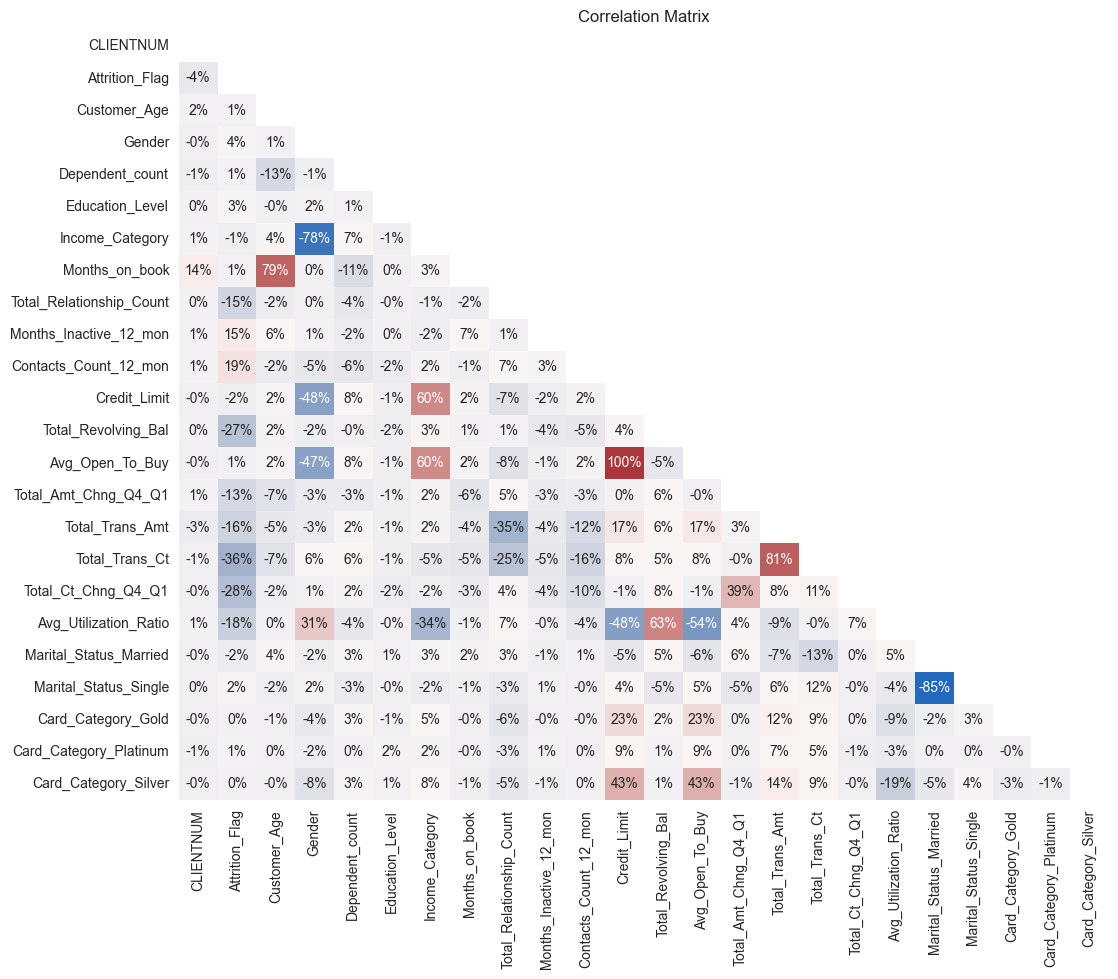

In [11]:
# Style
sns.set_style('white')

# Selecting features for corr matrix
numerical_features = df[df.columns]

# Calculating correlations
correlation_matrix_selected = numerical_features.corr()

# Generating mask
mask = np.triu(np.ones_like(correlation_matrix_selected, dtype=bool))

# Visualizing correlation matrix 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_selected, annot=True, mask=mask, cmap='vlag', fmt='.0%', annot_kws={'size': 10}, cbar=False)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Removing perfectly correlated column
df = df.drop(columns = ['Avg_Open_To_Buy']) 

<h3> 2.3 Figure 3 - Box-plots </h3>

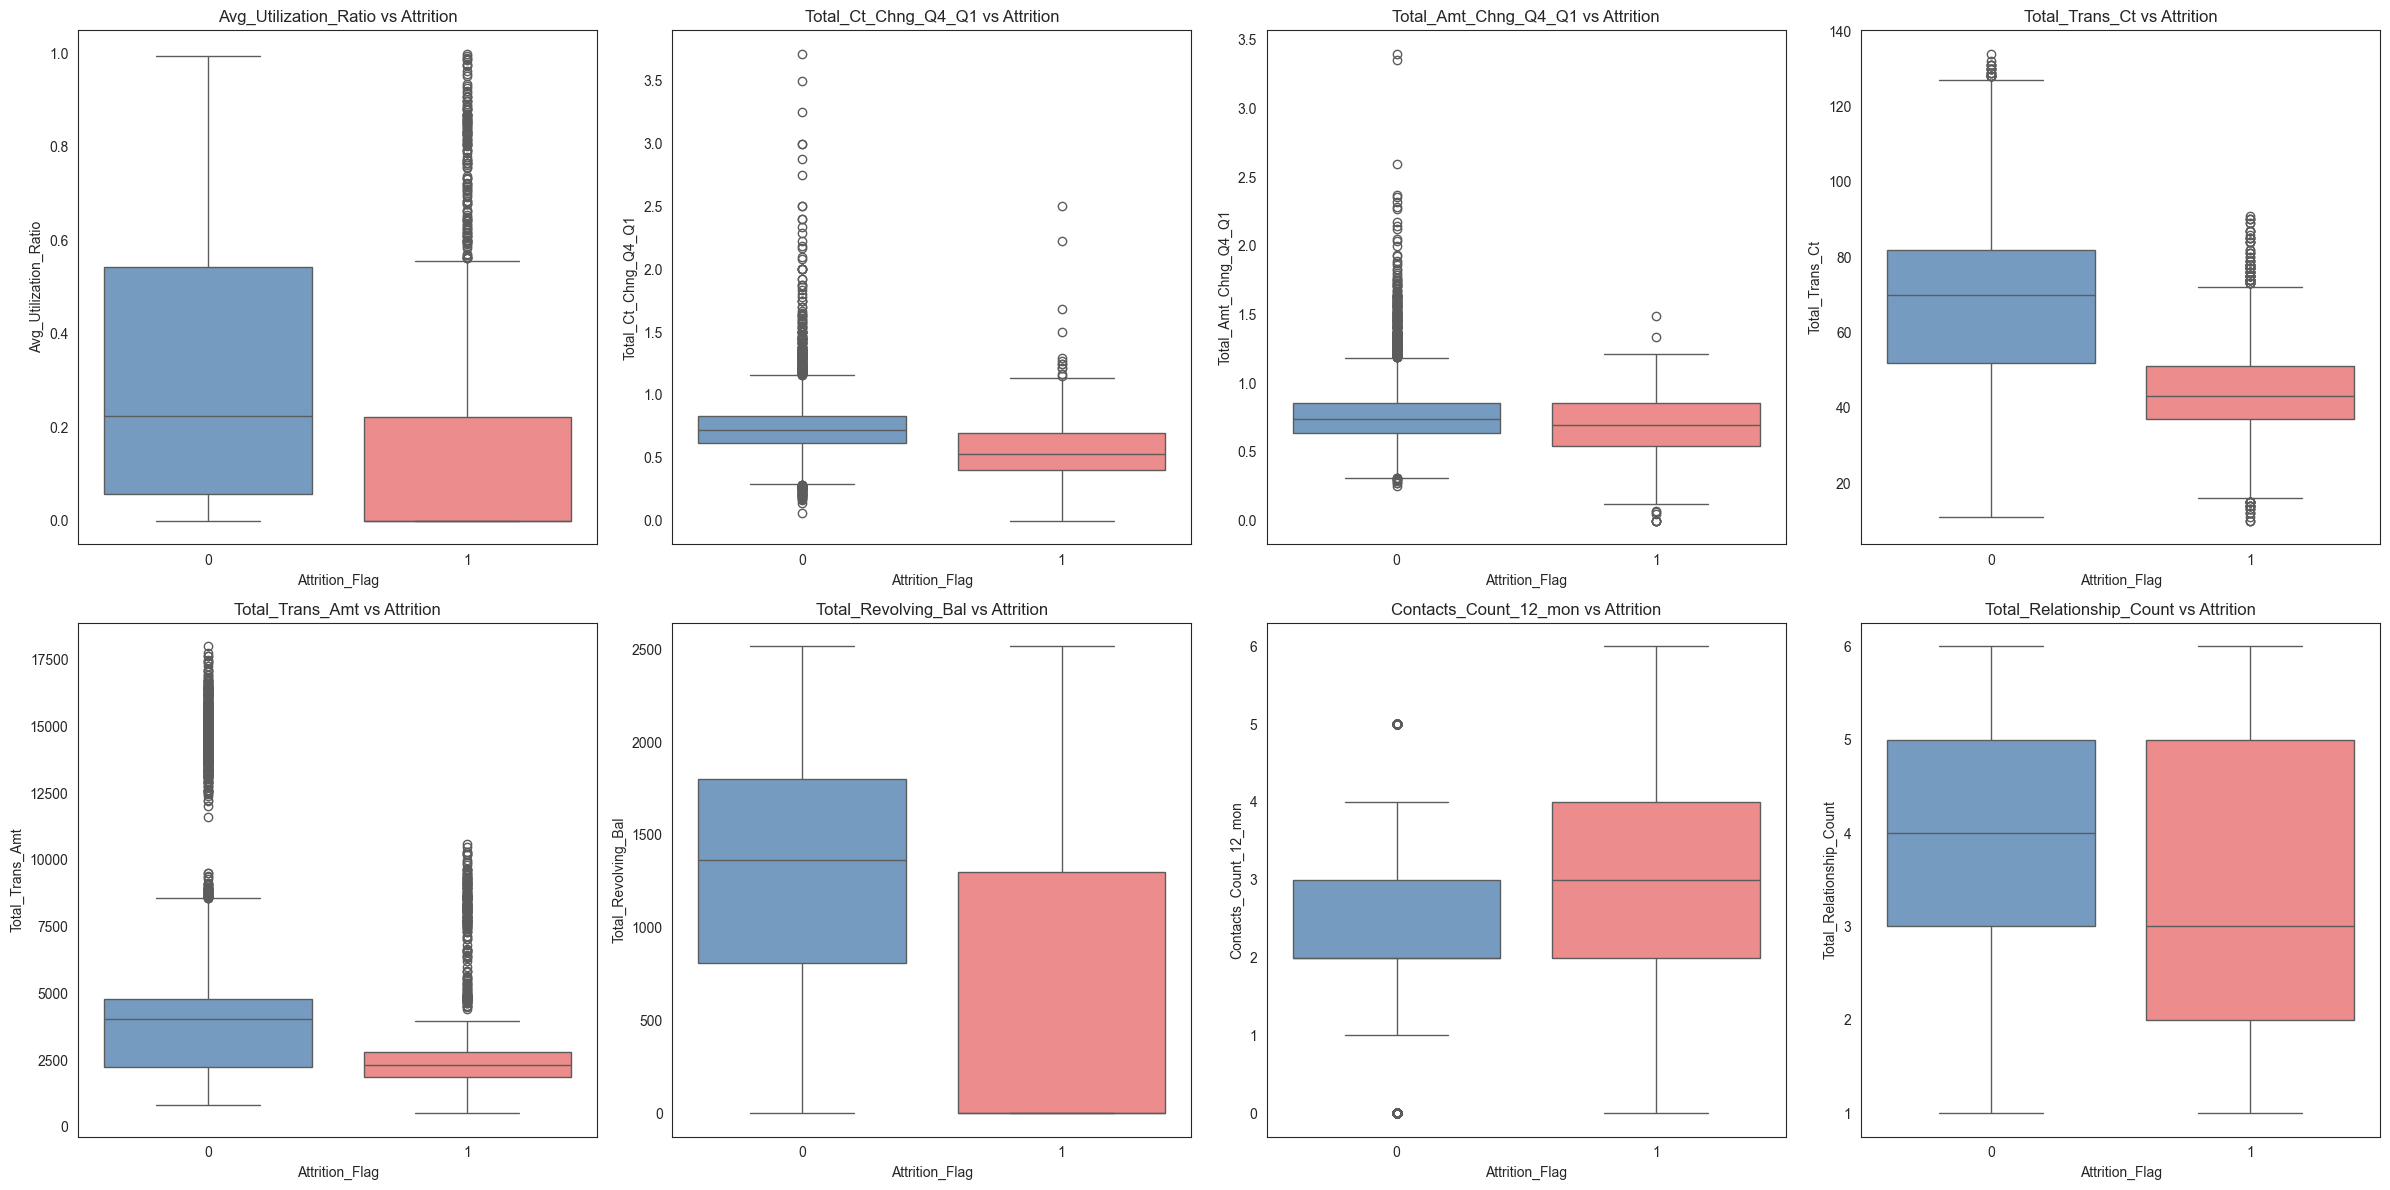

In [13]:
# Define list of columns we want to plot against Attrition_Flag
columns_to_plot = [
    'Avg_Utilization_Ratio', 'Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal', 
    'Contacts_Count_12_mon', 'Total_Relationship_Count']

plt.figure(figsize=(24, 12))

# Define colors
palette = ['#689ccc', '#fc7c7c']

# Create plot
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Attrition_Flag', y=column, data=numerical_features, palette=palette)
    plt.title(f'{column} vs Attrition')

plt.tight_layout()
plt.show()

Looking at some plots to determine if we are removing outliers:

<h3>2.4 Figure 4 - Distributions of numerical variables</h3>

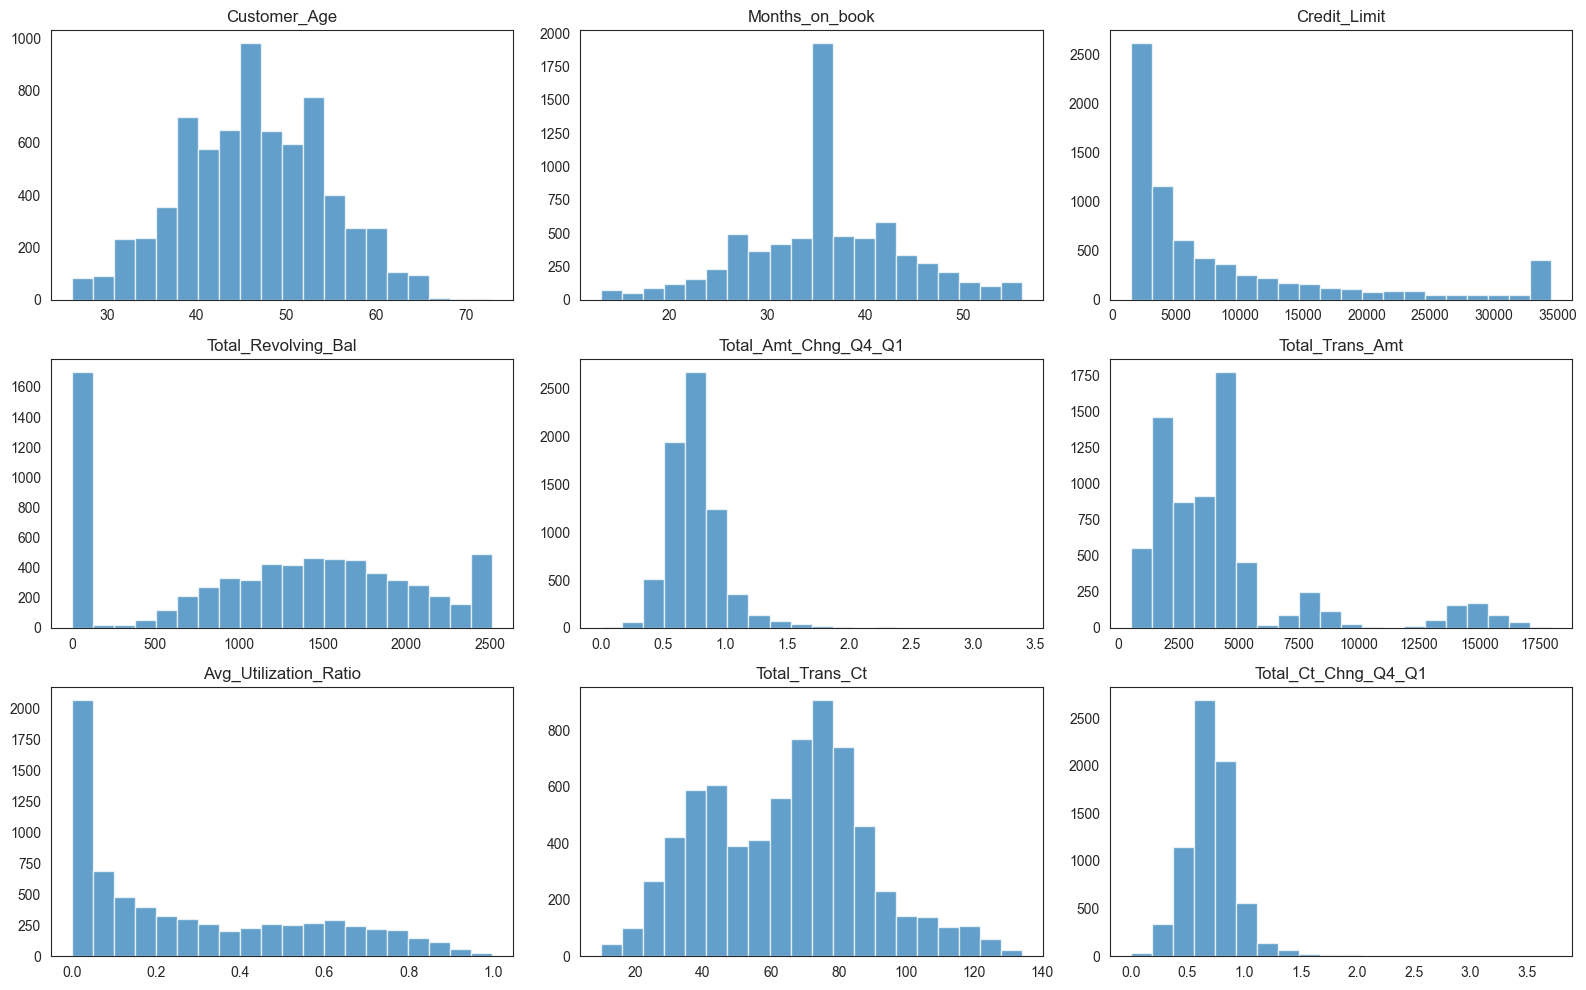

In [14]:
# Variables that we are checking ditribution of
variables_to_check = [
    'Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal',
    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Avg_Utilization_Ratio',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

# Create plot
fig, axes = plt.subplots(3, 3, figsize=(16, 10)) 
axes = axes.flatten() 

for i, var in enumerate(variables_to_check):
    axes[i].hist(df[var], bins=20, alpha=0.7, label=var)
    axes[i].set_title(var)
    
plt.tight_layout()
plt.show()

<h3>2.5 Figure 5 - Pairplot</h3>

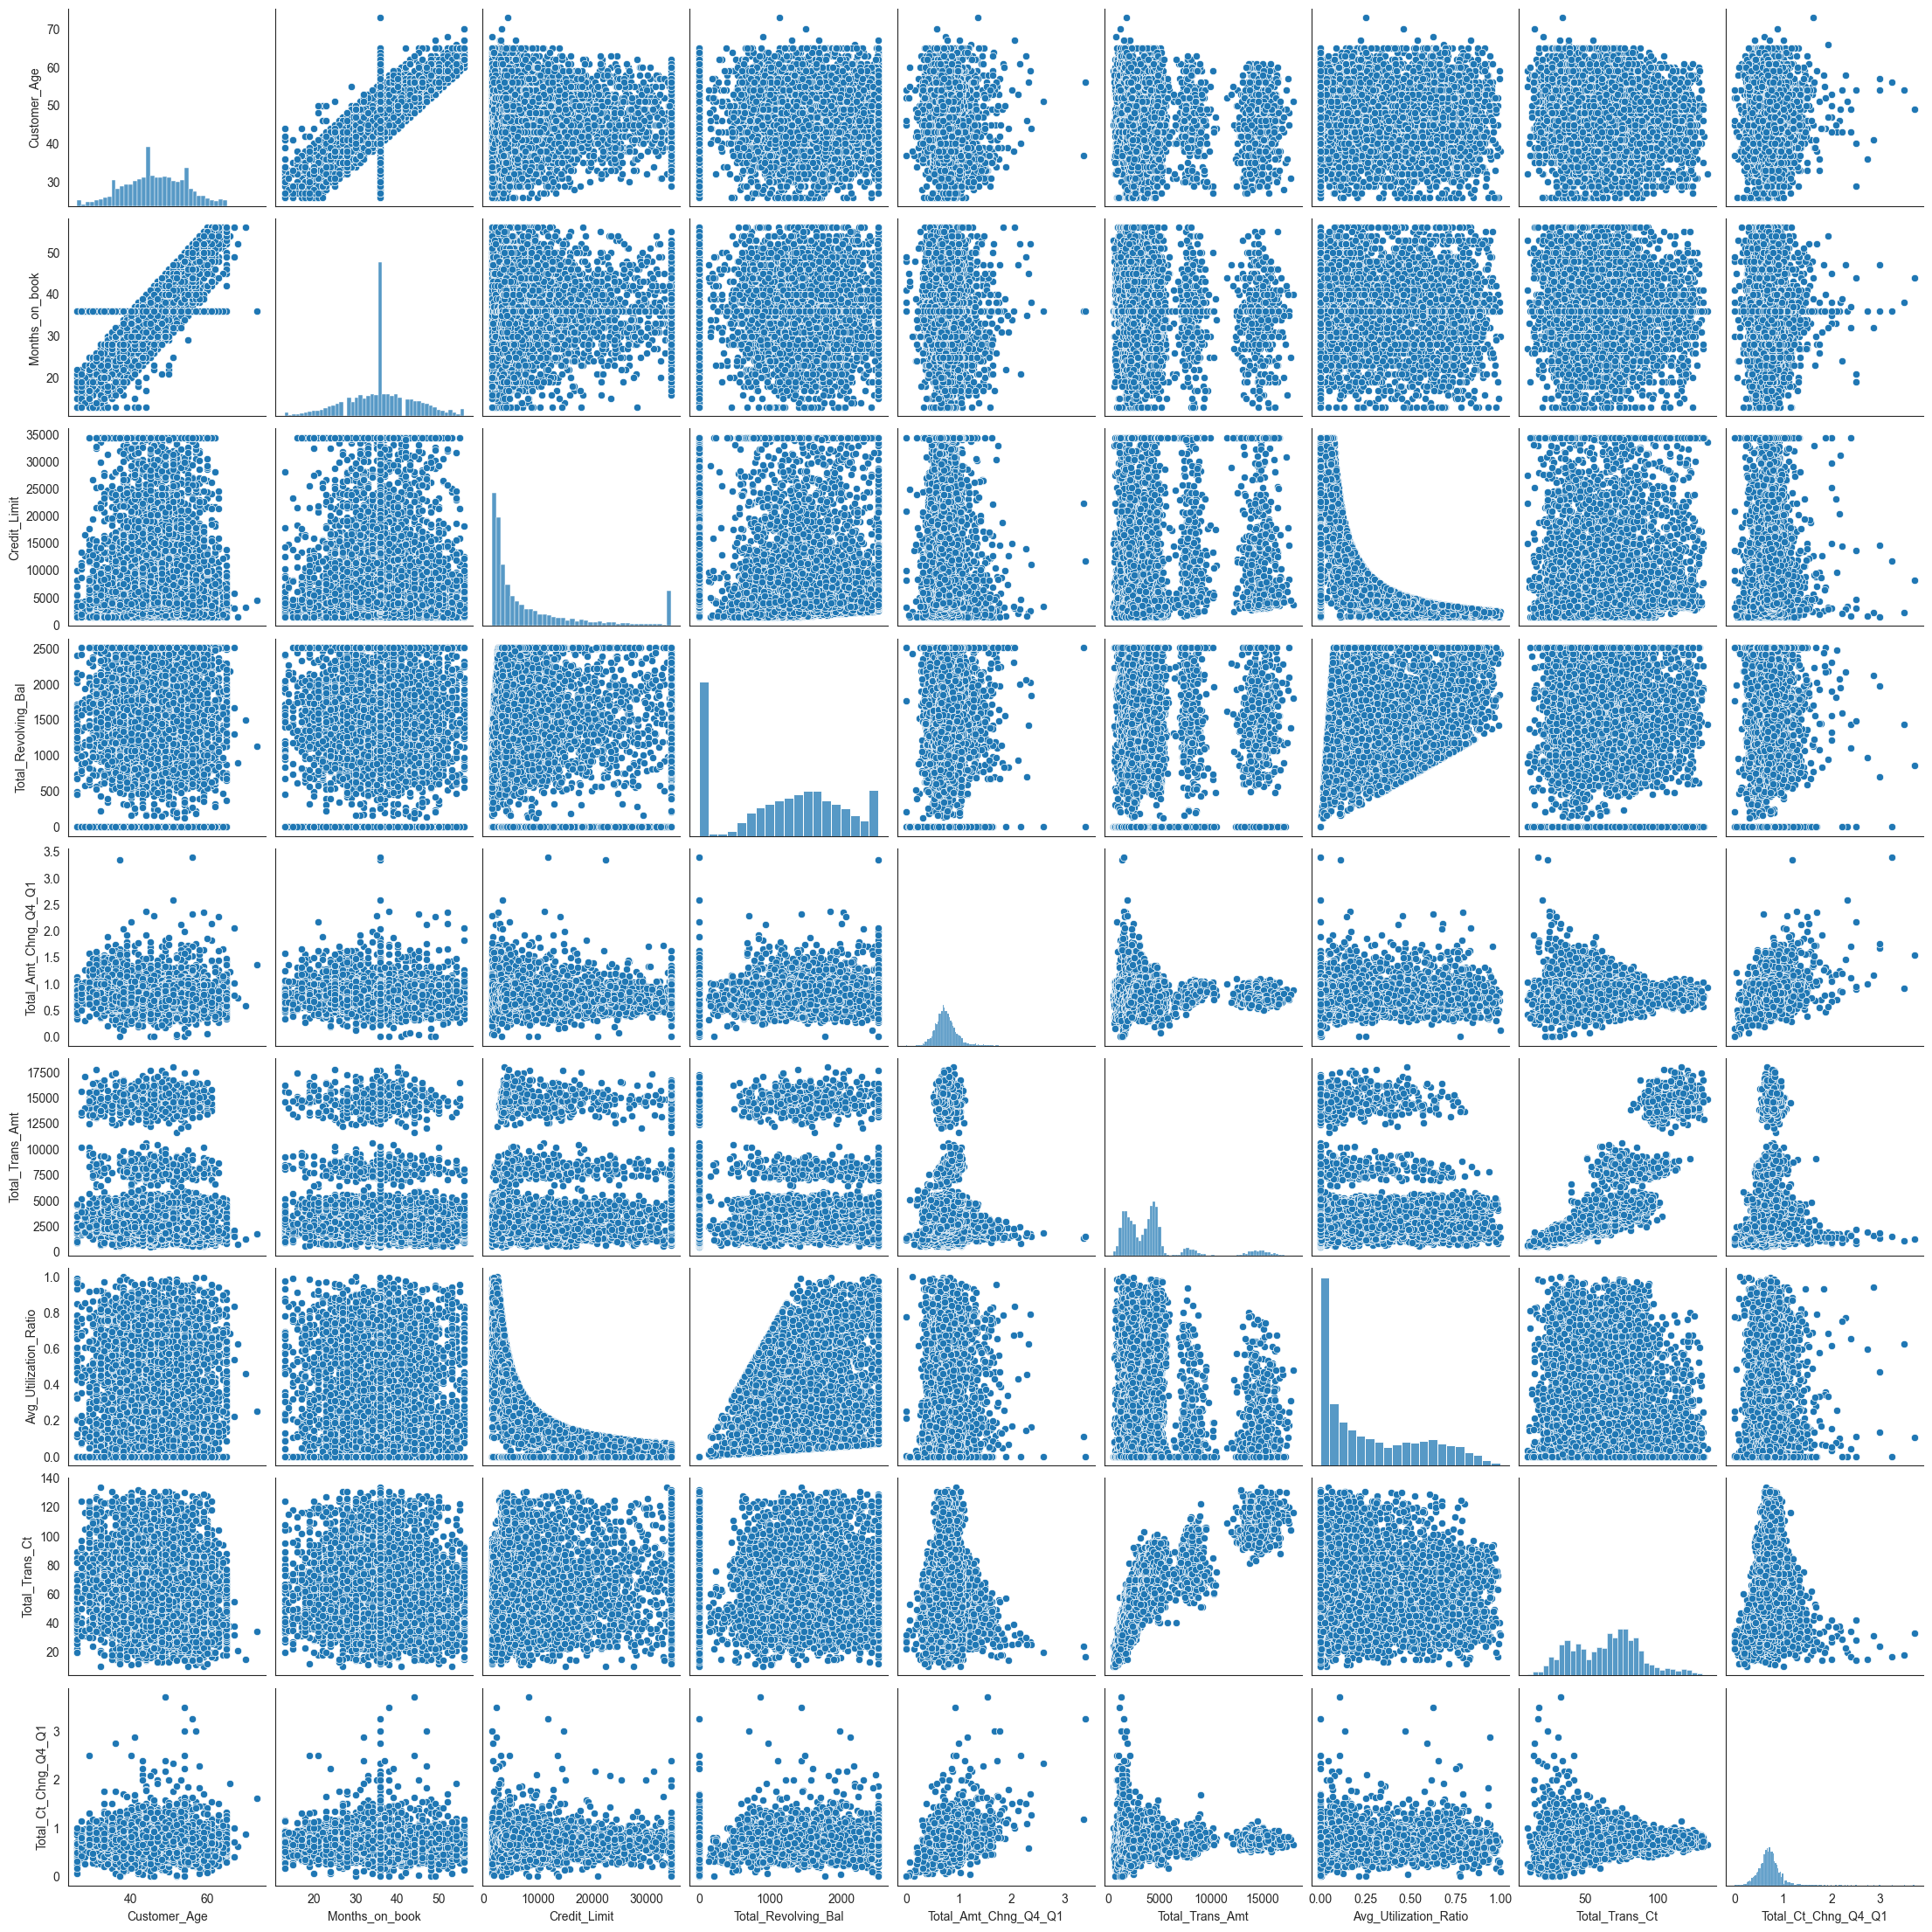

In [15]:
# Pairplot
sns.pairplot(df, vars=variables_to_check)
plt.show()

We determined not to remove any outliers all data entries look like they come from a naturual mechanism and therefore hold value

<h2> 3. Train-Test-Split </h2>

Before running any machine learning model we train-test-split the data:

In [16]:
# Defining features X and target variables y
X = df.drop('Attrition_Flag', axis=1)  # Dropping the target variable
y = df['Attrition_Flag']  # Target variable

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Verifying succesful split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((5664, 22), (1417, 22), (5664,), (1417,))

Checking if distributions of target variable are similar for test and train

In [17]:
# Checking the distribution of the target variable in both the training and testing sets
distribution_train = y_train.value_counts(normalize=True)
distribution_test = y_test.value_counts(normalize=True)

distribution_train, distribution_test

(Attrition_Flag
 0   0.84
 1   0.16
 Name: proportion, dtype: float64,
 Attrition_Flag
 0   0.85
 1   0.15
 Name: proportion, dtype: float64)

Looks similar. We continue looking at other variables:

In [18]:
# Checking the mean and standard deviation of feature variables in both the training and testing sets
mean_std_train = X_train.describe().loc[['mean', 'std']]
mean_std_test = X_test.describe().loc[['mean', 'std']]

# Comparing the mean values
mean_comparison = pd.DataFrame({'Train Mean': mean_std_train.loc['mean'], 'Test Mean': mean_std_test.loc['mean']})

# Comparing the standard deviation values
std_comparison = pd.DataFrame({'Train Std': mean_std_train.loc['std'], 'Test Std': mean_std_test.loc['std']})

mean_comparison, std_comparison

(                           Train Mean    Test Mean
 CLIENTNUM                739218041.29 738587803.45
 Customer_Age                    46.35        46.33
 Gender                           0.47         0.48
 Dependent_count                  2.33         2.38
 Education_Level                  2.06         2.09
 Income_Category                  1.34         1.36
 Months_on_book                  36.03        35.80
 Total_Relationship_Count         3.80         3.88
 Months_Inactive_12_mon           2.34         2.35
 Contacts_Count_12_mon            2.45         2.47
 Credit_Limit                  8474.80      8564.64
 Total_Revolving_Bal           1166.61      1171.06
 Total_Amt_Chng_Q4_Q1             0.76         0.76
 Total_Trans_Amt               4408.22      4338.65
 Total_Trans_Ct                  64.55        64.33
 Total_Ct_Chng_Q4_Q1              0.71         0.71
 Avg_Utilization_Ratio            0.28         0.27
 Marital_Status_Married           0.50         0.50
 Marital_Sta

Overall it looks good and even, but just to be sure we can look at the most important features for the data with a simple non-tuned RandomForestClassifier to verify that the variables that most likely will become most important for most ML models are similar for test and train

In [19]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
temp_X_train = X_train.drop(columns=['CLIENTNUM'])
rf_classifier.fit(temp_X_train, y_train)

# Getting feature importances
feature_importances = rf_classifier.feature_importances_

# Creating a feature importance DataFrame
feature_importances_df = pd.DataFrame({'Feature': temp_X_train.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Displaying the top 10 features
feature_importances_df.head(10)

Feature  Importance
12           Total_Trans_Amt        0.18
13            Total_Trans_Ct        0.17
14       Total_Ct_Chng_Q4_Q1        0.11
10       Total_Revolving_Bal        0.10
15     Avg_Utilization_Ratio        0.07
11      Total_Amt_Chng_Q4_Q1        0.07
6   Total_Relationship_Count        0.07
9               Credit_Limit        0.04
0               Customer_Age        0.04
8      Contacts_Count_12_mon        0.03

Now that we have the most important features we can look at the distributions:

<h3> 3.1 Figure 6 - train-test distribution comparison </h3>

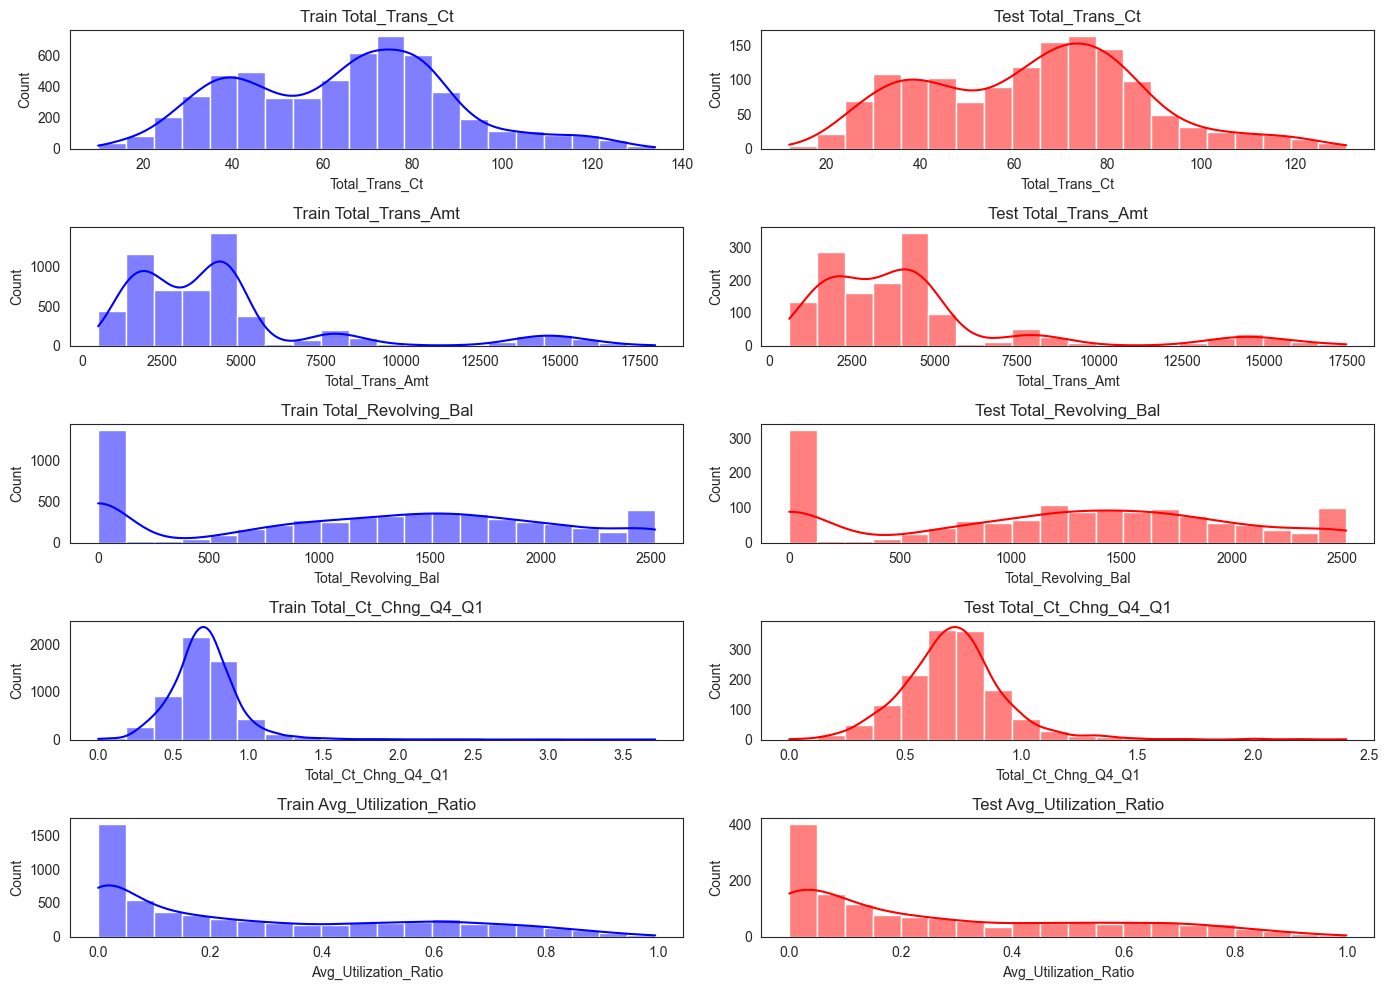

In [20]:
# Defining the important features
important_features = ['Total_Trans_Ct', 'Total_Trans_Amt', 
                      'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Figure size
plt.figure(figsize=(14, 10))

for i, feature in enumerate(important_features):
    # Plot for training data
    plt.subplot(len(important_features), 2, 2*i+1)
    sns.histplot(X_train[feature], color='blue', kde=True, bins=20)
    plt.title(f'Train {feature}')
    
    # Plot for testing data
    plt.subplot(len(important_features), 2, 2*i+2)
    sns.histplot(X_test[feature], color='red', kde=True, bins=20)
    plt.title(f'Test {feature}')

plt.tight_layout()
plt.show()

Being on the safe side we are verifying that we do not have any cross-contamination

In [21]:
# Checking if there are any data overlap
matches = X_test['CLIENTNUM'].isin(X_train['CLIENTNUM']).any()
matches

False

Earlier in the EDA we mentioned that the target variable 'Attrition_Flag' is imbalanced. To make sure the ML models we create do not favor the majority class we oversample the data so we get an even distribution of the target variable in the train data:

In [22]:
# SMOTE oversampling
smote = SMOTE(random_state=1234)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [23]:
# Making sure CLIENTUM is not duplicated in SMOTE process
X_train['CLIENTNUM'].value_counts()

CLIENTNUM
709965858    1
720441000    1
721314752    1
721334295    1
712655857    1
            ..
709087983    1
712645908    1
711607833    1
712691883    1
718352695    1
Name: count, Length: 9528, dtype: int64

Verifying that we have an even class distribution:

In [24]:
y_train.value_counts()

Attrition_Flag
0    4764
1    4764
Name: count, dtype: int64

We can also verify that we did not change the test data and compare them

In [25]:
# Checking the distribution of the target variable in both the training and testing sets
distribution_train = y_train.value_counts(normalize=True)
distribution_test = y_test.value_counts(normalize=True)

distribution_train, distribution_test

(Attrition_Flag
 0   0.50
 1   0.50
 Name: proportion, dtype: float64,
 Attrition_Flag
 0   0.85
 1   0.15
 Name: proportion, dtype: float64)

Seeing if we have skewed any of the important variables' distribution:

<h3> 3.2 Figure 6 - SMOTE train-test distribution comparison </h3>

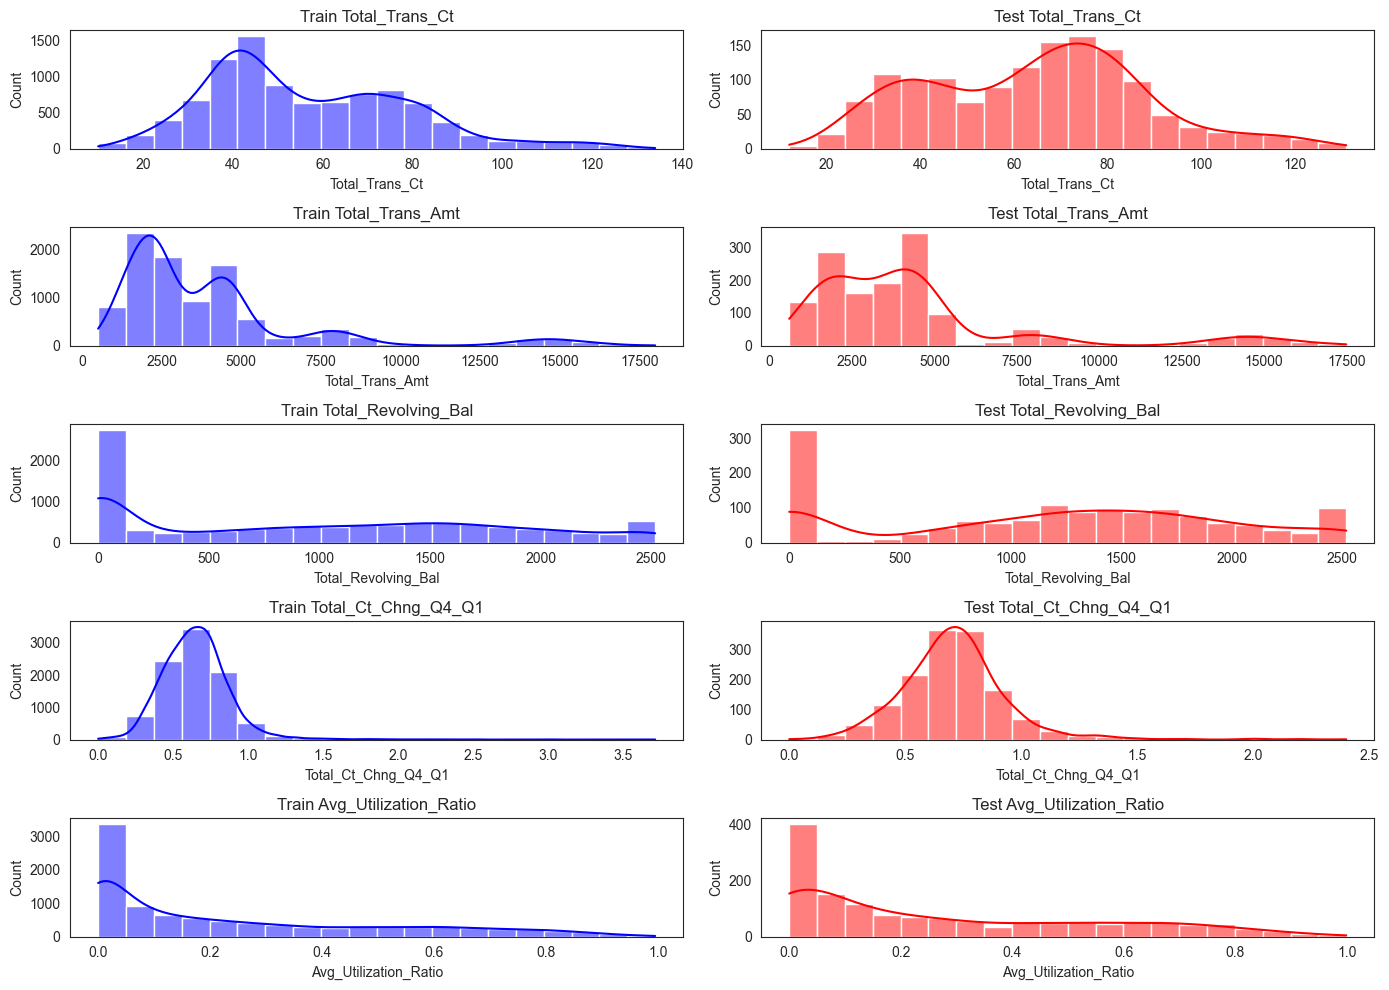

In [26]:
# Defining the important features
important_features = ['Total_Trans_Ct', 'Total_Trans_Amt', 
                      'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Figure size
plt.figure(figsize=(14, 10))

for i, feature in enumerate(important_features):
    # Plot for training data
    plt.subplot(len(important_features), 2, 2*i+1)
    sns.histplot(X_train[feature], color='blue', kde=True, bins=20)
    plt.title(f'Train {feature}')
    
    # Plot for testing data
    plt.subplot(len(important_features), 2, 2*i+2)
    sns.histplot(X_test[feature], color='red', kde=True, bins=20)
    plt.title(f'Test {feature}')

plt.tight_layout()
plt.show()

We can tell that the fit is not as good, however, we considered this tradeoff to be worth at and continued training ML models based on the SMOTE training data since it produced better results

In [27]:
# Checking if there are any data overlap
X_test['CLIENTNUM'].isin(X_train['CLIENTNUM']).any()

False

Now we can remove CLIENTUM so it does not influence any of the machine learning algorithms

In [28]:
X_train = X_train.drop(columns=['CLIENTNUM'])
X_test= X_test.drop(columns=['CLIENTNUM'])

<h2>4. Building Machine Learning Models </h2>

In this part we are testing three different ML models and checking how well they predict churn ('Attrition_Flag'). We will train the models based on their specific needs and requirements for effective implementation. We are optimizing towards area under the curve (AUC).

For all models we first create default model which is our baseline - if we get anything below it we have misjudged the tuning process or done something wrong. With having a minimum AUC we can see how much we can enhance performance through feature engineering and hyperparameter tuning.

For all models we create a 'study' with the Optuna framework where we apply cross-validation on the training data within the study.

Before building any models, we follow the "Don't Repeat Yourself" (DRY) principle by creating functions for logic that is used repeatedly:

In [29]:
# Getting default as a baseline
def get_baseline(model):
  model.fit(X_train, y_train)

  # Predict probabilities for the test set
  y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

  # Calculate AUC
  auc_score = roc_auc_score(y_test, y_proba)
  print(f'Baseline AUC: {auc_score:.4f}')

In [30]:
# Getting ROC-AUC and confusion matrix
def get_auc_and_cm(X_train, X_test, model):
  model.fit(X_train, y_train)

  # Getting AUC score
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  auc_score = roc_auc_score(y_test, y_pred_proba)

  # Print AUC Score
  print(f'AUC Score: {auc_score}')

  # Predict churn for confusion matrix and ROC curve
  y_pred = model.predict(X_test)

  # Plot the ROC curve
  fpr, tpr = roc_curve(y_test, y_pred_proba)[:2]
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right', fontsize=20)
  plt.show()

  # Plot the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={'size': 24})

  label_font = {'size':'10'}
  ax.set_xlabel('Predicted labels', fontdict=label_font)
  ax.set_ylabel('Observed labels', fontdict=label_font)

  title_font = {'size':'18'}  
  ax.set_title('Confusion Matrix', fontdict=title_font)

  ax.tick_params(axis='both', which='major', labelsize=12) 
  ax.xaxis.set_ticklabels(['False', 'True'])
  ax.yaxis.set_ticklabels(['False', 'True'])
  plt.show()

Setting a seed for our hyperparameter tuning sampler and removing logs in addition to creating general function for returning hyperparameters:

In [31]:
sampler = optuna.samplers.TPESampler(seed=42) # Setting seed for sampler
optuna.logging.set_verbosity(optuna.logging.WARNING) # Removing logs

# Optimizing study and returning the best parameters
def optimize_study(objective, n_trials):
  study = optuna.create_study(direction='maximize', sampler=sampler)
  study.optimize(objective, n_trials=n_trials) 
  params = study.best_params
  return params

Functions used for both decision tree and XGboost:

In [32]:
# Extracting columns and hyperparameters

def columns_keep(params, X_train = X_train, X_test = X_test):
  # Finding all features with value equals True
  column_params = {key: value for key, value in params.items() if key.startswith('include_') and value}
  
  # Generate the list of column names to keep by removing include_
  columns_to_keep = [key[len('include_'):] for key, value in column_params.items() if value]

  # Subset the original X_train and X_test based on the columns to keep
  X_train_temp = X_train[columns_to_keep]
  X_test_temp = X_test[columns_to_keep]

  # Getting parameters excluding columns
  params_excluding_features = {key: value for key, value in params.items() if not key.startswith('include_')}

  return X_train_temp, X_test_temp, params_excluding_features

# Extracting feature importance

def extract_importance(model, X_train):
  # Get important variables
  importances = model.feature_importances_

  # Get the feature names
  feature_names = np.array(X_train.columns)

  # Sort the features by importance
  sorted_idx = np.argsort(importances)[::-1]

  # Print the features sorted by importance
  print('Features sorted by importance:')
  for index in sorted_idx:
      print(f'{feature_names[index]}: {importances[index]:.4f}')

<h3>4.1 Logistic regression </h3>

Setting a baseline with default parameters (Except solver = 'liblinear' since we use it for binary classification and it is suited for l2 regularization which is the default in scikit-learn):

In [33]:
# Setting baseline

# Initialize the logistic regression model
log_model_baseline = LogisticRegression(solver='liblinear', random_state=42)
get_baseline(log_model_baseline)

Baseline AUC: 0.8962


With a baseline AUC of 0.9008, we'll begin tuning by scaling non-binary features, as logistic regression is sensitive to feature scale:

In [34]:
def identify_column_types(df):
    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    non_binary_columns = [col for col in df.columns if col not in binary_columns]
    return binary_columns, non_binary_columns

# Identify binary and non-binary columns
binary_columns, non_binary_columns = identify_column_types(X_train)

# Separate the binary and non-binary columns
X_train_binary = X_train[binary_columns]
X_train_non_binary = X_train[non_binary_columns]

X_test_binary = X_test[binary_columns]
X_test_non_binary = X_test[non_binary_columns]

# Instantiate StandardScaler object
scaler = StandardScaler()

# Fit Scaler on non-binary train data
X_train_non_binary_scaled = pd.DataFrame(scaler.fit_transform(X_train_non_binary), 
                                         columns=X_train_non_binary.columns, 
                                         index=X_train_non_binary.index)

# Using transform so we apply the train fit on test
X_test_non_binary_scaled = pd.DataFrame(scaler.transform(X_test_non_binary), 
                                        columns=X_test_non_binary.columns, 
                                        index=X_test_non_binary.index)

# Concatenating DataFrames
X_train_processed = pd.concat([X_train_non_binary_scaled, X_train_binary], axis=1)
X_test_processed = pd.concat([X_test_non_binary_scaled, X_test_binary], axis=1)

Now that our data is ready, we can proceed to hyperparameter tuning. A key focus will be on the penalty hyperparameter, which plays a crucial role in managing multicollinearity, which is a known sensitivity issue in logistic regression models.

In [35]:
def log_objective(trial):
  
  # Hyperparameters to be tuned
  penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
  C = trial.suggest_float('C', 0.0001, 20, log=True)
  l1_ratio = trial.suggest_float('l1_ratio', 0, 1) if penalty == 'elasticnet' else None
  solver = 'saga' if penalty == 'elasticnet' else 'liblinear'

  # Model definition with high max_iter to ensure convergence
  log_model = LogisticRegression(penalty=penalty, C=C, solver=solver, l1_ratio=l1_ratio, random_state=42, max_iter=5000)
  
  # Cross-validation AUC scores
  auc_scores = cross_val_score(log_model, X_train_processed, y_train, cv=10, scoring='roc_auc', n_jobs=-1)
  
  # Return the mean AUC score
  return auc_scores.mean()

In [36]:
log_params = optimize_study(log_objective, n_trials=100)
# Manually inserting solver as it is not in the study object
log_params['solver'] = 'liblinear' if log_params['penalty'] == 'l1' else ('saga' if log_params['penalty'] == 'elasticnet' else 'liblinear')
print(f'Best params for logistic regression: {log_params}')

Best params for logistic regression: {'penalty': 'elasticnet', 'C': 0.15406831680413186, 'l1_ratio': 0.13712947299413136, 'solver': 'saga'}


AUC Score: 0.9009249294214903


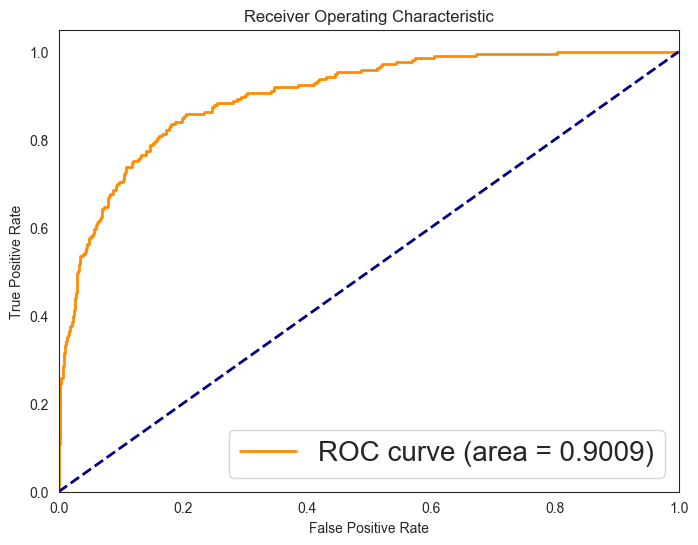

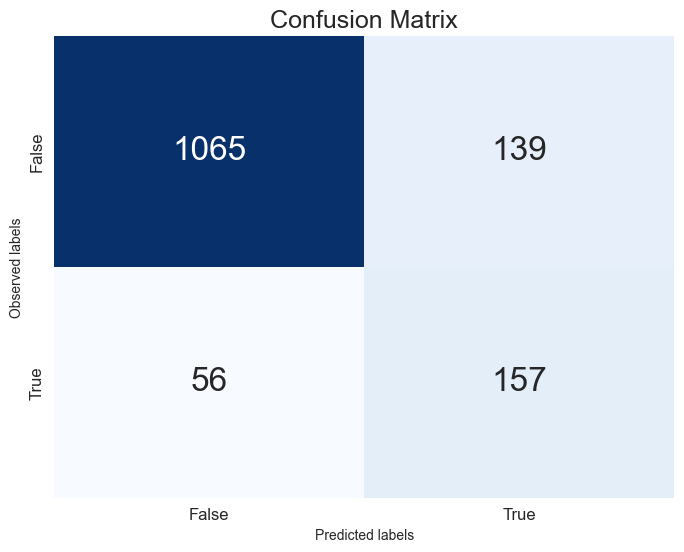

In [37]:
# Use best params to create the logistic regression model
model_logistic = LogisticRegression(random_state=42, **log_params)

# Plot auc and CM
get_auc_and_cm(X_train_processed, X_test_processed, model=model_logistic)

Altough first a bit dissatisfied that there were so little improvement we soon realized that tuning for logistic regression rarely increases performance by much (Gusarov, 2022).

<h3>4.2 Decision Tree Classifier </h3>

First looking at the default model and corresponding AUC:

In [38]:
# Checking baseline
dt_default = DecisionTreeClassifier(random_state=42)
get_baseline(dt_default)

Baseline AUC: 0.8707


Due to decision trees' challenges with managing non-significant features, we've decided to include feature selection as part of our hyperparameter tuning process for the model. This approach allows us to identify and retain only those features that contribute meaningfully to the model's performance.

In [39]:
def dectree_objective(trial):
    # Dynamic feature inclusion/exclusion
    selected_features = []
    for feature in X_train.columns:
        # For each feature, decide if it should be included
        if trial.suggest_categorical(f'include_{feature}', [True, False]):
            selected_features.append(feature)

    # Subset the training to only include selected features
    X_train_selected = X_train[selected_features]

    # Define the hyperparameter space for other parameters
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0001, 0.0020),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 64),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 64),
    }

    # Create and train the model on the selected features
    model = DecisionTreeClassifier(random_state=42, **params)

    auc_scores = cross_val_score(model, X_train_selected, y_train, cv=10, scoring='roc_auc', n_jobs=-1)

    return auc_scores.mean()

In [40]:
dectree_params = optimize_study(dectree_objective, n_trials=100)
print(f'Best params for decision tree classifier: {dectree_params}')

Best params for decision tree classifier: {'include_Customer_Age': True, 'include_Gender': True, 'include_Dependent_count': True, 'include_Education_Level': False, 'include_Income_Category': False, 'include_Months_on_book': True, 'include_Total_Relationship_Count': True, 'include_Months_Inactive_12_mon': True, 'include_Contacts_Count_12_mon': True, 'include_Credit_Limit': True, 'include_Total_Revolving_Bal': True, 'include_Total_Amt_Chng_Q4_Q1': False, 'include_Total_Trans_Amt': True, 'include_Total_Trans_Ct': True, 'include_Total_Ct_Chng_Q4_Q1': True, 'include_Avg_Utilization_Ratio': True, 'include_Marital_Status_Married': True, 'include_Marital_Status_Single': False, 'include_Card_Category_Gold': False, 'include_Card_Category_Platinum': False, 'include_Card_Category_Silver': True, 'criterion': 'entropy', 'ccp_alpha': 0.0006463428974613143, 'max_depth': 19, 'min_samples_split': 60, 'min_samples_leaf': 22}


Now we have to remove the variabels as hyperparameters from the study object in order to create the tuned tree. Here we also only include the variables the study found.

AUC Score: 0.9612071654734609


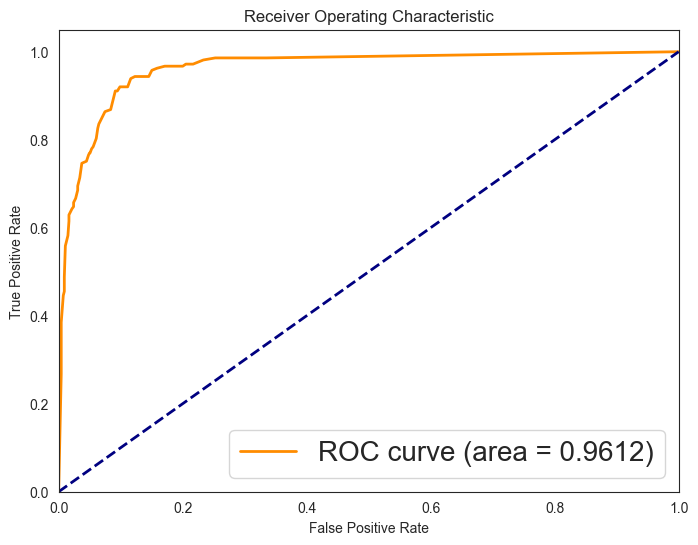

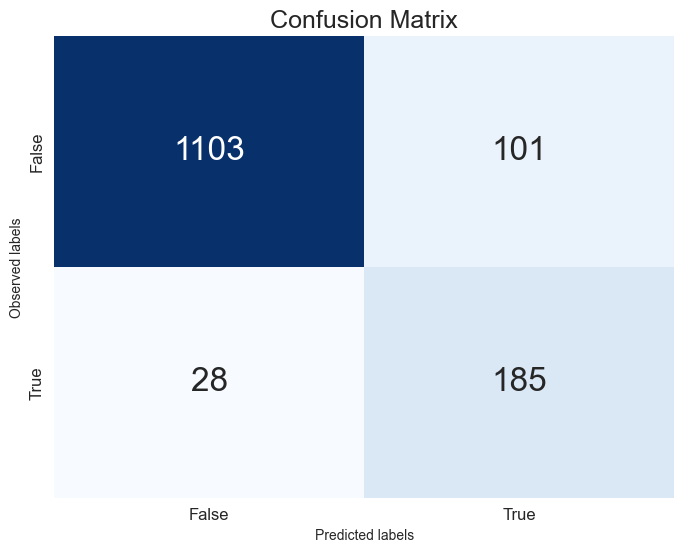

In [41]:
X_train_dectree, X_test_dectree, params_dectree = columns_keep(dectree_params) 
model_dectree = DecisionTreeClassifier(random_state=42, **params_dectree)
get_auc_and_cm(X_train=X_train_dectree, X_test=X_test_dectree, model = model_dectree)

In [42]:
extract_importance(model_dectree, X_train_dectree)

Features sorted by importance:
Total_Trans_Ct: 0.4584
Total_Trans_Amt: 0.1677
Total_Relationship_Count: 0.1165
Total_Revolving_Bal: 0.0907
Total_Ct_Chng_Q4_Q1: 0.0876
Customer_Age: 0.0249
Avg_Utilization_Ratio: 0.0198
Marital_Status_Married: 0.0158
Months_Inactive_12_mon: 0.0105
Credit_Limit: 0.0062
Months_on_book: 0.0020
Card_Category_Silver: 0.0000
Contacts_Count_12_mon: 0.0000
Dependent_count: 0.0000
Gender: 0.0000


<h3>4.3 Extreme Gradient Boosting</h3>

In [43]:
xgb_default = XGBClassifier(random_state=42)
get_baseline(xgb_default)

Baseline AUC: 0.9873


Already we can see that the default performs very well, highlighting how good the XGboost model is. Let's see how much more performance we can squeeze out of this model. Since the XGboost is similar to the decision tree the same methodology is employed:

In [44]:
def xgboost_objective(trial):
    # Dynamic feature inclusion/exclusion
    selected_features = []
    for feature in X_train.columns:
        if trial.suggest_categorical(f'include_{feature}', [True, False]):
            selected_features.append(feature)

    # Subset the training to only include selected features
    X_train_selected = X_train[selected_features]

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.00001, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.00001, 1.0, log=True),
    }

    # Create and train the model on the selected features
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **params)

    auc_scores = cross_val_score(model, X_train_selected, y_train, cv=10, scoring='roc_auc', n_jobs=-1) 

    return auc_scores.mean()

In [45]:
xgboost_params = optimize_study(xgboost_objective, n_trials=10)
print(f'Best params for XGboost: {xgboost_params}')

Best params for XGboost: {'include_Customer_Age': True, 'include_Gender': True, 'include_Dependent_count': True, 'include_Education_Level': False, 'include_Income_Category': True, 'include_Months_on_book': True, 'include_Total_Relationship_Count': False, 'include_Months_Inactive_12_mon': False, 'include_Contacts_Count_12_mon': False, 'include_Credit_Limit': False, 'include_Total_Revolving_Bal': False, 'include_Total_Amt_Chng_Q4_Q1': True, 'include_Total_Trans_Amt': True, 'include_Total_Trans_Ct': True, 'include_Total_Ct_Chng_Q4_Q1': False, 'include_Avg_Utilization_Ratio': False, 'include_Marital_Status_Married': True, 'include_Marital_Status_Single': True, 'include_Card_Category_Gold': True, 'include_Card_Category_Platinum': False, 'include_Card_Category_Silver': True, 'n_estimators': 471, 'max_depth': 6, 'learning_rate': 0.07228668160985365, 'subsample': 0.9153097038938646, 'colsample_bytree': 0.9825134553332563, 'min_child_weight': 38, 'reg_alpha': 0.04511670516970848, 'reg_lambda': 

Due to the broad hyperparameter space, finding improvements over the default model needed substantial computation. For demonstration, we've set trials to 10, but running 500 trials, which we've done, yields better results. This can be achieved by fixing the Exception below, but be prepared for a longer computation time.

In [46]:
try:
  raise Exception('THIS ERROR IS HERE ON PURPOSE') # Remove this to run (takes some time - approx 30 min. depending on PC)
  xgboost_params = optimize_study(xgboost_objective, n_trials=500)
  print(f'Best params for XGboost: {xgboost_params}')
except Exception:
  print('Remove Exception to run')

Remove Exception to run


Given that we have previously had n_trails at 500 and noted the outcome, we can directly input the hyperparameters:

In [47]:
xgboost_params = {'include_Customer_Age': True, 'include_Gender': False, 
                  'include_Dependent_count': False, 'include_Education_Level': False, 
                  'include_Income_Category': True, 'include_Months_on_book': False, 
                  'include_Total_Relationship_Count': True, 'include_Months_Inactive_12_mon': False, 
                  'include_Contacts_Count_12_mon': True, 'include_Credit_Limit': False, 
                  'include_Total_Revolving_Bal': True, 'include_Total_Amt_Chng_Q4_Q1': True, 
                  'include_Total_Trans_Amt': True, 'include_Total_Trans_Ct': True, 
                  'include_Total_Ct_Chng_Q4_Q1': True, 'include_Avg_Utilization_Ratio': True, 
                  'include_Marital_Status_Married': True, 'include_Marital_Status_Single': True, 
                  'include_Card_Category_Gold': False, 'include_Card_Category_Platinum': True, 
                  'include_Card_Category_Silver': False, 'n_estimators': 934, 
                  'max_depth': 8, 'learning_rate': 0.013217322437673361, 'subsample': 0.882591190450568, 
                  'colsample_bytree': 0.5430961516644891, 'min_child_weight': 1,
                    'reg_alpha': 0.23193493091855263, 'reg_lambda': 4.120464396092944e-05}

AUC Score: 0.9885280676305899


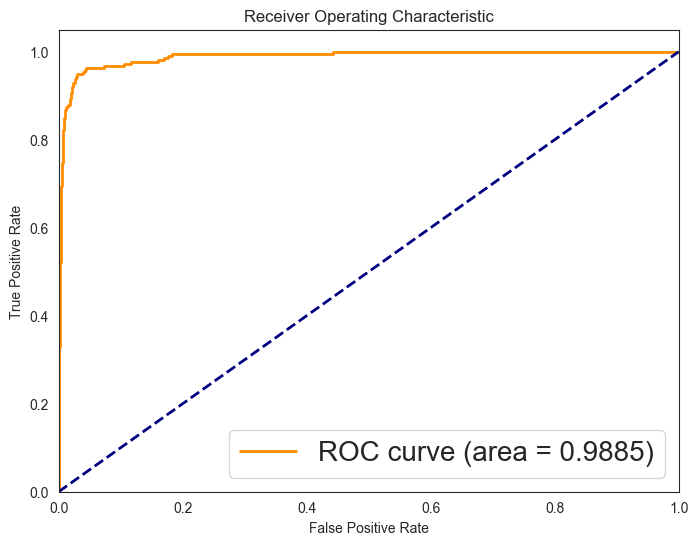

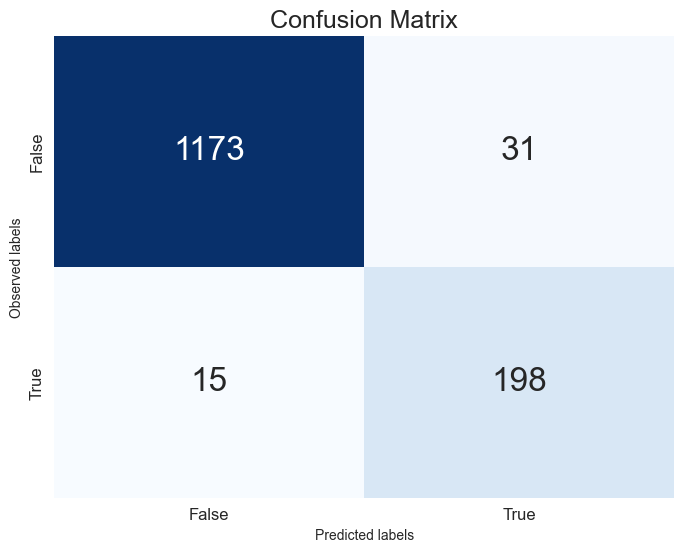

In [48]:
X_train_xgboost, X_test_xgboost, xgboost_params = columns_keep(xgboost_params)
model_xgboost = XGBClassifier(random_state=42, label_encoder = False, eval_metric='logloss', **xgboost_params)
get_auc_and_cm(X_train=X_train_xgboost, X_test=X_test_xgboost, model=model_xgboost) 

In [49]:
extract_importance(model_xgboost, X_train_xgboost)

Features sorted by importance:
Total_Trans_Ct: 0.2193
Total_Relationship_Count: 0.1223
Marital_Status_Married: 0.1152
Total_Trans_Amt: 0.1067
Total_Revolving_Bal: 0.0913
Marital_Status_Single: 0.0872
Total_Ct_Chng_Q4_Q1: 0.0780
Total_Amt_Chng_Q4_Q1: 0.0407
Customer_Age: 0.0384
Contacts_Count_12_mon: 0.0350
Avg_Utilization_Ratio: 0.0348
Income_Category: 0.0311
Card_Category_Platinum: 0.0000


Comments regarding the results are in the associated report

<h2> 5. Sources </h2>

Gusarov, M. (2022, April). Do I Need to Tune Logistic Regression Hyperparameters? Medium. https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69